In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [174]:
df = pd.read_csv('add.csv')

In [175]:
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

In [176]:
df.shape

(255687, 21)

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

column_name = 'CrimeGroup_Name'
unique_values_count = df[column_name].nunique()
print(unique_values_count)




97


In [178]:

value_counts = df[column_name].value_counts(normalize=True)
cumulative_sum = value_counts.cumsum()
filtered_values = cumulative_sum[cumulative_sum <= 0.95]
selected_values = filtered_values.index.tolist()

# Filter the original DataFrame to include only rows with selected crime group names
df_new = df[df[column_name].isin(selected_values)]

In [179]:
column_name = 'CrimeGroup_Name'
unique_values_count = df_new[column_name].nunique()
print(unique_values_count)

29


In [180]:
unique_values = df_new['CrimeGroup_Name'].unique()
print(unique_values)


['KARNATAKA POLICE ACT 1963' 'Karnataka State Local Act' 'RIOTS'
 'MISSING PERSON' 'SCHEDULED CASTE AND THE SCHEDULED TRIBES '
 'CASES OF HURT' 'BURGLARY - NIGHT' 'MOLESTATION' 'MURDER'
 'CRUELTY BY HUSBAND' 'CRIMINAL TRESPASS' 'CRIMINAL INTIMIDATION' 'THEFT'
 'BURGLARY - DAY' 'CHEATING' 'ATTEMPT TO MURDER' 'POCSO'
 'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)' 'SUICIDE'
 'PUBLIC SAFETY' 'KIDNAPPING AND ABDUCTION'
 'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTANCES' 'ROBBERY'
 'CRIMES RELATED TO WOMEN' ' CYBER CRIME' 'DACOITY'
 'COTPA, CIGARETTES AND OTHER TOBACCO PRODUCTS' 'CrPC' 'NEGLIGENT ACT']


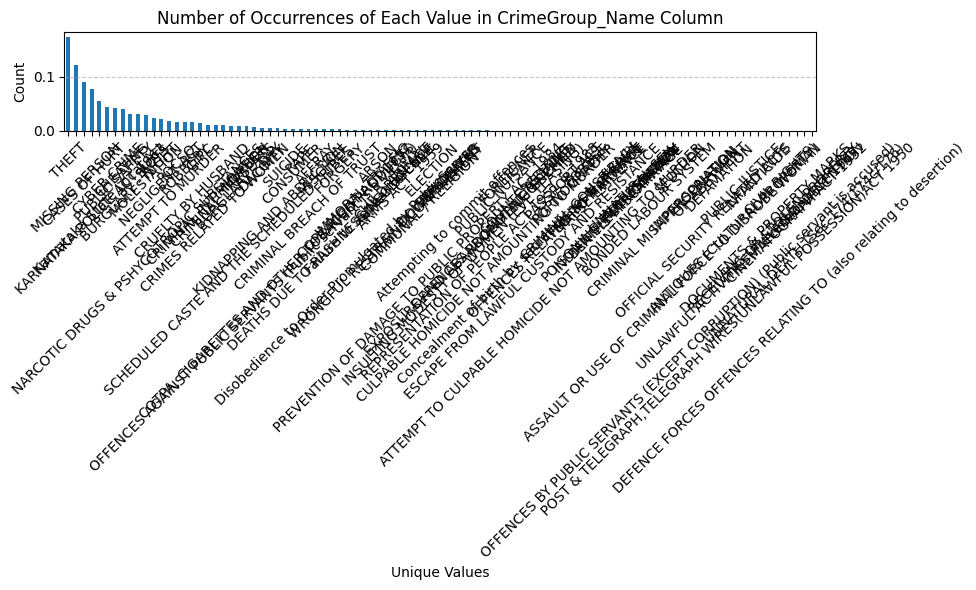

In [181]:

# Plot the value counts
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title(f'Number of Occurrences of Each Value in {column_name} Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [182]:
df.shape

(255687, 21)

In [183]:
selected_columns = ['CrimeGroup_Name', 'Latitude', 'Longitude', 'FIR_Date']
df = df[selected_columns]

# Displaying the new DataFrame
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,06-01-2019
475,Karnataka State Local Act,16.141122,75.910169,14-01-2019
476,RIOTS,16.109622,75.931844,20-01-2019
477,RIOTS,16.109778,75.931920,20-01-2019
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,03-02-2019
...,...,...,...,...
775136,ATTEMPT TO MURDER,17.484623,77.628086,19-11-2023
775137,CRIMINAL INTIMIDATION,17.487559,77.628566,26-12-2023
775138,ATTEMPT TO MURDER,17.516223,76.511136,28-12-2023
775139,ATTEMPT TO MURDER,17.556849,76.124689,29-12-2023


In [184]:
df.dropna(inplace=True)

In [185]:
df.shape

(255687, 4)

In [186]:
df['FIR_Date'] = pd.to_datetime(df['FIR_Date'], format='%d-%m-%Y')

In [187]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,2019-01-06
475,Karnataka State Local Act,16.141122,75.910169,2019-01-14
476,RIOTS,16.109622,75.931844,2019-01-20
477,RIOTS,16.109778,75.931920,2019-01-20
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,2019-02-03
...,...,...,...,...
775136,ATTEMPT TO MURDER,17.484623,77.628086,2023-11-19
775137,CRIMINAL INTIMIDATION,17.487559,77.628566,2023-12-26
775138,ATTEMPT TO MURDER,17.516223,76.511136,2023-12-28
775139,ATTEMPT TO MURDER,17.556849,76.124689,2023-12-29


In [188]:
df['year'] = df['FIR_Date'].dt.year
df['month'] = df['FIR_Date'].dt.month
df['day'] = df['FIR_Date'].dt.day
df['hour'] = df['FIR_Date'].dt.hour
df['weekday'] = df['FIR_Date'].dt.weekday

In [189]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date,year,month,day,hour,weekday
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,2019-01-06,2019,1,6,0,6
475,Karnataka State Local Act,16.141122,75.910169,2019-01-14,2019,1,14,0,0
476,RIOTS,16.109622,75.931844,2019-01-20,2019,1,20,0,6
477,RIOTS,16.109778,75.931920,2019-01-20,2019,1,20,0,6
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,2019-02-03,2019,2,3,0,6
...,...,...,...,...,...,...,...,...,...
775136,ATTEMPT TO MURDER,17.484623,77.628086,2023-11-19,2023,11,19,0,6
775137,CRIMINAL INTIMIDATION,17.487559,77.628566,2023-12-26,2023,12,26,0,1
775138,ATTEMPT TO MURDER,17.516223,76.511136,2023-12-28,2023,12,28,0,3
775139,ATTEMPT TO MURDER,17.556849,76.124689,2023-12-29,2023,12,29,0,4


In [190]:
df.drop(columns=['hour'], inplace=True)

In [191]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date,year,month,day,weekday
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,2019-01-06,2019,1,6,6
475,Karnataka State Local Act,16.141122,75.910169,2019-01-14,2019,1,14,0
476,RIOTS,16.109622,75.931844,2019-01-20,2019,1,20,6
477,RIOTS,16.109778,75.931920,2019-01-20,2019,1,20,6
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,2019-02-03,2019,2,3,6
...,...,...,...,...,...,...,...,...
775136,ATTEMPT TO MURDER,17.484623,77.628086,2023-11-19,2023,11,19,6
775137,CRIMINAL INTIMIDATION,17.487559,77.628566,2023-12-26,2023,12,26,1
775138,ATTEMPT TO MURDER,17.516223,76.511136,2023-12-28,2023,12,28,3
775139,ATTEMPT TO MURDER,17.556849,76.124689,2023-12-29,2023,12,29,4


In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [193]:
df = df.head(500)

In [194]:
df.shape

(500, 8)

In [195]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date,year,month,day,weekday
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,2019-01-06,2019,1,6,6
475,Karnataka State Local Act,16.141122,75.910169,2019-01-14,2019,1,14,0
476,RIOTS,16.109622,75.931844,2019-01-20,2019,1,20,6
477,RIOTS,16.109778,75.931920,2019-01-20,2019,1,20,6
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,2019-02-03,2019,2,3,6
...,...,...,...,...,...,...,...,...
1629,ATTEMPT TO MURDER,15.922817,75.464708,2020-01-27,2020,1,27,0
1630,THEFT,15.844884,75.575091,2020-01-29,2020,1,29,2
1631,KARNATAKA POLICE ACT 1963,15.892228,75.587026,2020-01-29,2020,1,29,2
1632,CASES OF HURT,15.916404,75.675555,2020-02-06,2020,2,6,3


In [196]:
features = ['year', 'month', 'day', 'Latitude', 'Longitude']
X = df[features]
y = df['CrimeGroup_Name']

In [197]:

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example prediction
example_data = pd.DataFrame({'year': [2024],
                             'month': [7],
                             'day': [14],
                             'Latitude': [40.7128],
                             'Longitude': [-74.0060]})
prediction = rf_classifier.predict(example_data)
print("Predicted crime:", prediction[0])

Accuracy: 0.3
Predicted crime: THEFT


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import HeatMap

In [199]:
# le = LabelEncoder()
# df.loc[:, 'CrimeGroup_Name'] = le.fit_transform(df['CrimeGroup_Name'])


In [200]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date,year,month,day,weekday
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,2019-01-06,2019,1,6,6
475,Karnataka State Local Act,16.141122,75.910169,2019-01-14,2019,1,14,0
476,RIOTS,16.109622,75.931844,2019-01-20,2019,1,20,6
477,RIOTS,16.109778,75.931920,2019-01-20,2019,1,20,6
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,2019-02-03,2019,2,3,6
...,...,...,...,...,...,...,...,...
1629,ATTEMPT TO MURDER,15.922817,75.464708,2020-01-27,2020,1,27,0
1630,THEFT,15.844884,75.575091,2020-01-29,2020,1,29,2
1631,KARNATAKA POLICE ACT 1963,15.892228,75.587026,2020-01-29,2020,1,29,2
1632,CASES OF HURT,15.916404,75.675555,2020-02-06,2020,2,6,3


In [201]:
# X = df.drop(['CrimeGroup_Name', 'FIR_Date'], axis=1)
# y = df['CrimeGroup_Name']
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Train Random Forest model
# rfc = RandomForestClassifier(n_estimators=100)
# rfc.fit(X_train, y_train)

# # Predictions
# y_pred = rfc.predict(X_test)

# # Model evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [202]:

# # Predict crime locations for a specific date/time
# # This can be done by creating a grid of latitude and longitude coordinates and predicting the crime type for each point
# # Then, visualize the predicted crimes on a heatmap

# # Create a grid of latitude and longitude coordinates
# min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
# min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()



In [203]:
# # Generate grid points
# grid_points = []
# for lat in np.linspace(min_lat, max_lat, num=10):
#     for lon in np.linspace(min_lon, max_lon, num=10):
#         grid_points.append([lat, lon])


In [204]:
# # Predict crime types for grid points
# predicted_crimes = rfc.predict(X)  # Predict using the original features X

# # Create heatmap
# heat_data = [[point[0], point[1]] for idx, point in enumerate(grid_points) if predicted_crimes[idx] == 1]
# crime_heatmap = folium.Map(location=[np.mean(df['Latitude']), np.mean(df['Longitude'])], zoom_start=12)
# HeatMap(heat_data).add_to(crime_heatmap)

# # Display heatmap
# crime_heatmap.save('crime_heatmap.html')
# crime_heatmap


In [205]:
# from sklearn.ensemble import GradientBoostingClassifier
# X = df.drop(['CrimeGroup_Name', 'FIR_Date'], axis=1)
# y = df['CrimeGroup_Name']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train Gradient Boosting model
# gbc = GradientBoostingClassifier(n_estimators=100)
# gbc.fit(X_train, y_train)

# # Predictions
# y_pred = gbc.predict(X_test)

# # Model evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [206]:
# from sklearn.svm import SVC
# X = df.drop(['CrimeGroup_Name', 'FIR_Date'], axis=1)
# y = df['CrimeGroup_Name']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Train Support Vector Machine model
# svm = SVC(kernel='linear', C=1.0)
# svm.fit(X_train, y_train)
# # Predictions
# y_pred = svm.predict(X_test)

# # Model evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Predict crime locations for a specific date/time

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pydot
from io import StringIO
from IPython.display import Image

In [208]:
df['FIR_Date']

474    2019-01-06
475    2019-01-14
476    2019-01-20
477    2019-01-20
478    2019-02-03
          ...    
1629   2020-01-27
1630   2020-01-29
1631   2020-01-29
1632   2020-02-06
1633   2020-02-09
Name: FIR_Date, Length: 500, dtype: datetime64[ns]

In [209]:
# # Drop rows with missing values
# df.dropna(inplace=True)

# # Split features and target variable
# X = df[['year', 'month', 'day']]
# y = df.drop(['year', 'month', 'day''], axis=1)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # KNN Model
# knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(X_train, y_train)
# knn_accuracy = knn.score(X_test, y_test)

# # Decision Tree Model
# dtree = DecisionTreeClassifier(max_depth=500, random_state=300)
# dtree.fit(X_train, y_train)
# dtree_accuracy = dtree.score(X_test, y_test)

# # Random Forest Model
# rfc = RandomForestClassifier(n_estimators=100)
# rfc.fit(X_train, y_train)
# rfc_accuracy = rfc.score(X_test, y_test)

# # Feature Importances for Decision Tree
# dot_data = StringIO()  
# export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True,
#                 feature_names=X.columns)  
# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png())

# # Feature Importances for Random Forest
# rfc_features = rfc.feature_importances_
# indices = np.argsort(rfc_features)
# plt.figure(figsize=(10,6))
# plt.barh(range(len(indices)), rfc_features[indices], color='b', align='center')
# plt.yticks(range(len(indices)), X.columns[indices])
# plt.xlabel('Relative Importance')
# plt.show()

# # Model Accuracies
# print("KNN Accuracy:", knn_accuracy)
# print("Decision Tree Accuracy:", dtree_accuracy)
# print("Random Forest Accuracy:", rfc_accuracy)

# # List of unique values in 'CrimeGroup_Name' column
# unique_values = df['CrimeGroup_Name'].unique()
# print("Unique values in 'CrimeGroup_Name' column:", unique_values)




In [210]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [211]:
# Check the unique values in the target variable
print(df['CrimeGroup_Name'].unique())


['KARNATAKA POLICE ACT 1963' 'Karnataka State Local Act' 'RIOTS'
 'MISCHIEF' 'MISSING PERSON' 'SCHEDULED CASTE AND THE SCHEDULED TRIBES '
 'CASES OF HURT' 'BURGLARY - NIGHT'
 'INSULTING MODESTY OF WOMEN (EVE TEASING)' 'MOLESTATION'
 ' REPRESENTATION OF PEOPLE ACT 1951 & 1988' 'MURDER' 'CRUELTY BY HUSBAND'
 'CRIMINAL TRESPASS' 'CRIMINAL INTIMIDATION' 'THEFT'
 'EXPOSURE AND ABANDONMENT OF CHILD' 'CONSUMER'
 'DEATHS DUE TO RASHNESS/NEGLIGENCE' 'BURGLARY - DAY' 'CHEATING'
 'ATTEMPT TO MURDER' 'POCSO'
 'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)' 'SUICIDE'
 'PUBLIC SAFETY' 'ARSON' 'KIDNAPPING AND ABDUCTION'
 'COMMUNAL / RELIGION   ' 'CHILDREN ACT'
 'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTANCES' 'ROBBERY' 'FORGERY' 'RAPE'
 'ANTIQUES (CULTURAL PROPERTY)' 'CRIMES RELATED TO WOMEN' ' CYBER CRIME'
 'CRIMINAL CONSPIRACY'
 'ATTEMPT TO CULPABLE HOMICIDE NOT AMOUNTING TO MURDER' 'ELECTION'
 'AFFRAY']


In [ ]:
# Split features and target variable
X = df[['Latitude', 'Longitude', 'day', 'month', 'year']]
y = df['CrimeGroup_Label']

# Train Random Forest Model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, y)

# Function to predict crime hotspots for a given day
def predict_crime_hotspots(day):
    # Create dates for the next month
    dates_next_month = pd.date_range(start=pd.Timestamp.now().date() + pd.DateOffset(days=1), periods=30, freq='D')
    
    # Prepare data for prediction
    X_pred = pd.DataFrame({'Latitude': df['Latitude'].mean(),
                           'Longitude': df['Longitude'].mean(),
                           'day': day,
                           'month': dates_next_month.month,
                           'year': dates_next_month.year})
    
    # Predict crime hotspots
    predictions = rfc.predict(X_pred)
    
    # Prepare data for heatmap
    heat_data = []
    for index, row in X_pred.iterrows():
        heat_data.extend([[row['Latitude'], row['Longitude']] for _ in range(predictions.shape[0])])
    
    # Create base map
    map_osm = folium.Map(location=[X_pred['Latitude'].mean(), X_pred['Longitude'].mean()], zoom_start=11)
    
    # Add heatmap layer
    HeatMap(heat_data).add_to(map_osm)
    
    # Display map
    display(map_osm)

# Call the function to predict and plot crime hotspots for each day of the next month
for day in range(1, 32):
    predict_crime_hotspots(day)